In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#read files
data = pd.read_csv('unbalanced_reviews.csv')

In [3]:
data.head()

,4,1682581870,57098525,13637412,صراع الجذور والانتماء، عقلة ساق الخيزان توائم نفسها وتنمو ايا كانت التربة. فكك الكاتب المجتمع الفلبيني والكويتي،غاص عميقا عميقا في تعقيداتهما معا،، رواية ممتعة.
0,5,1682385404,56693085,13637412,كتاب رائع. اعتقد ان الروايه كلها تلخصت بجمله و...
1,4,1682039752,30836455,13637412,رواية تلامس الروح بعمقها، فخورة اني اخيرا لقيت...
2,5,1681553886,6680940,13637412,رواية محكمة بكل اختصار. وكان الجزء المفضل بالن...
3,3,1681248984,19011044,13637412,هذا الكتاب يحزن مرا، ظلم واضطهاد عيسى بلا ذنب ...
4,4,1680848104,54035328,13637412,رواية واقعية ورائعة تمثل أحداث تكررت كثيرا في ...


In [4]:
len(data)

65534

In [5]:
data = data.drop(columns=['1682581870','57098525','13637412'])

In [6]:
data.columns = ['rating','review']

In [7]:
data.head()

,rating,review
0,5,كتاب رائع. اعتقد ان الروايه كلها تلخصت بجمله و...
1,4,رواية تلامس الروح بعمقها، فخورة اني اخيرا لقيت...
2,5,رواية محكمة بكل اختصار. وكان الجزء المفضل بالن...
3,3,هذا الكتاب يحزن مرا، ظلم واضطهاد عيسى بلا ذنب ...
4,4,رواية واقعية ورائعة تمثل أحداث تكررت كثيرا في ...


# Number of reviews per rating category

In [8]:
#count ratings 
ratings_counts = data.rating.value_counts()
ratings_counts

5    25437
4    19108
3    11422
2     5637
1     3930
Name: rating, dtype: int64

([<matplotlib.patches.Wedge at 0x1214bca10>,
 [Text(0.3786217078775749, 1.0327853612071913, '5'),
  Text(-1.075087786369876, -0.23277940544283526, '4'),
  Text(0.11637270755581254, -1.0938269483497514, '3'),
  Text(0.8776693765783772, -0.663096120797372, '2'),
  Text(1.0805361237500897, -0.20601379873962627, '1')],
 [Text(0.20652093156958626, 0.563337469749377, '38.8%'),
  Text(-0.5864115198381141, -0.12697058478700105, '29.2%'),
  Text(0.06347602230317047, -0.5966328809180461, '17.4%'),
  Text(0.478728750860933, -0.36168879316220287, '8.6%'),
  Text(0.5893833402273215, -0.11237116294888705, '6.0%')])

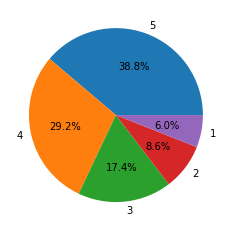

In [9]:
#percentage of ratings
plt.pie(ratings_counts,labels=list(ratings_counts.index),autopct='%1.1f%%')

<BarContainer object of 5 artists>

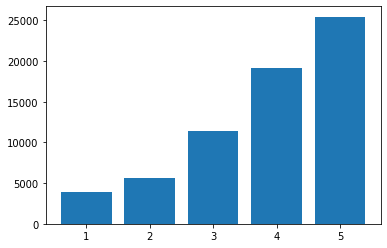

In [10]:
plt.bar(x=list(ratings_counts.index),height=ratings_counts)

# Ratio of positive vs negative reviews

In [11]:
#percentage of positve (4,5) vs negative reviews (3,2,1)
pos = data[data.rating > 3]
neg = data[data.rating <= 3]

num_pos = len(pos)
num_neg = len(neg)

per_pos = num_pos / len(data) * 100
per_neg = num_neg / len(data) * 100

print("Positive Rating: %",round(per_pos,2))
print("Negative Rating: %",round(per_neg,2))

Positive Rating: % 67.97
Negative Rating: % 32.03


([<matplotlib.patches.Wedge at 0x124446d90>,
 [Text(-0.5886024873868703, 0.9292723561163267, 'Pos'),
  Text(0.5886024873868707, -0.9292723561163266, 'Neg')],
 [Text(-0.32105590221102015, 0.5068758306089055, '67.97%'),
  Text(0.3210559022110203, -0.5068758306089054, '32.03%')])

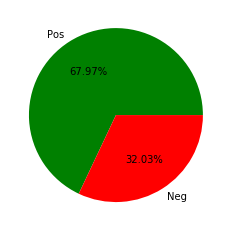

In [12]:
#pie
pos_neg_count = [num_pos,num_neg]
plt.pie(pos_neg_count,labels=['Pos','Neg'],autopct='%1.2f%%',colors=['green','red'])

# Avg \#words(length)/rating 

In [13]:
#mean number of words in each category
data = data.assign(words_count=lambda data: data.review.str.count(' '))

In [14]:
data.head()

,rating,review,words_count
0,5,كتاب رائع. اعتقد ان الروايه كلها تلخصت بجمله و...,16
1,4,رواية تلامس الروح بعمقها، فخورة اني اخيرا لقيت...,21
2,5,رواية محكمة بكل اختصار. وكان الجزء المفضل بالن...,99
3,3,هذا الكتاب يحزن مرا، ظلم واضطهاد عيسى بلا ذنب ...,42
4,4,رواية واقعية ورائعة تمثل أحداث تكررت كثيرا في ...,22


In [15]:
ratings = data.groupby(by=['rating'])

In [16]:
stats = ratings.agg({'words_count':['mean','median','std','count']})

In [17]:
stats

words_count                          
              mean median         std  count
rating                                      
1        70.079389     32  122.600859   3930
2        78.543729     43  120.777050   5637
3        75.137629     43  104.341302  11422
4        72.853308     41  106.218460  19108
5        66.972913     34  104.142633  25437

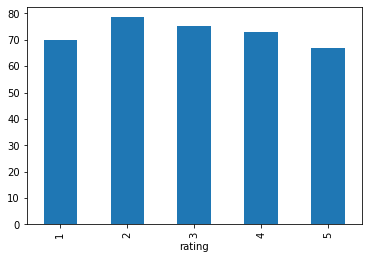

In [18]:
stats['words_count']['mean'].plot(kind='bar')

# Median \#words(length)/rating


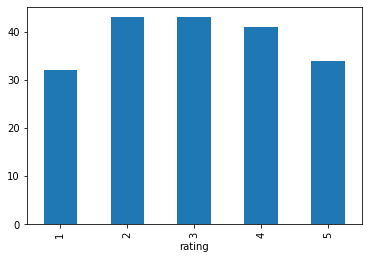

In [19]:
stats['words_count']['median'].plot(kind='bar')

# Top words in each category

In [20]:
pos_words = []
for s in pos['review']:
    pos_words.append(s)

In [21]:
pos_words_str = ' '.join(pos_words)

In [22]:
neg_words = []
for s in neg['review']:
    neg_words.append(s)

In [23]:
neg_words_str = ' '.join(neg_words)

In [24]:
from collections import Counter

def count(string,top):
    # split() returns list of all the words in the string 
    split_it = string.split() 
  
    # Pass the split_it list to instance of Counter class. 
    counter = Counter(split_it) 
  
    # most_common() produces k frequently encountered 
    # input values and their respective counts. 
    most_occur = counter.most_common(top) 
    
    return most_occur

## without pre-processing

In [25]:
#no pre processing
top_pos = count(pos_words_str,10)
top_neg = count(neg_words_str,10)

### Top positive

In [26]:
top_pos

[('من', 74584),
 ('و', 67958),
 ('في', 60125),
 ('..', 34997),
 ('على', 25572),
 ('ما', 24157),
 ('الرواية', 23279),
 ('لا', 22272),
 ('،', 20731),
 ('عن', 20432)]

### Top Negative

In [27]:
top_neg

[('من', 35100),
 ('و', 33032),
 ('في', 31230),
 ('..', 15232),
 ('الرواية', 14623),
 ('لا', 13371),
 ('على', 13082),
 ('ما', 11891),
 ('ان', 10672),
 ('أن', 10480)]

## with pre processing

In [28]:
#pre process
import preprocessing_ar

In [29]:
pos_words_str_clean = preprocessing_ar.pre_process(pos_words_str)

In [30]:
neg_words_str_clean = preprocessing_ar.pre_process(neg_words_str)

In [31]:
#no pre processing
top_pos = pd.DataFrame(count(pos_words_str_clean,100), columns=['word','count'])
top_neg = pd.DataFrame(count(neg_words_str_clean,100), columns=['word','count'])

### top positive

In [32]:
top_pos

,word,count
0,رواي,54141
1,ما,24503
2,لا,22746
3,كل,17282
4,كتاب,15013
...,...,...
95,امر,2678
96,حقيقي,2627
97,هاي,2625
98,بحث,2585


In [33]:
top_pos.to_csv('top_pos.csv')

### top negative

In [34]:
top_neg

,word,count
0,رواي,30170
1,لا,13728
2,ما,12143
3,كتاب,9765
4,لم,9694
...,...,...
95,بل,1346
96,قارئ,1330
97,مجتمع,1328
98,اسلوب,1306


In [35]:
top_neg.to_csv('top_neg.csv')

In [36]:
dif_p = top_pos.merge(top_neg['word'])
dif_p = dif_p.rename(columns={'count':'count_pos'})
dif_p

,word,count_pos
0,رواي,54141
1,ما,24503
2,لا,22746
3,كل,17282
4,كتاب,15013
...,...,...
73,كبير,2770
74,!!,2766
75,حقيق,2679
76,امر,2678


In [37]:
dif_n = top_neg.merge(top_pos['word'],how='inner')
dif_n = dif_n.rename(columns={'count':'count_negative'})
dif_n

,word,count_negative
0,رواي,30170
1,لا,13728
2,ما,12143
3,كتاب,9765
4,لم,9694
...,...,...
73,امر,1393
74,كان,1374
75,بل,1346
76,مجتمع,1328


In [38]:
dif_both = dif_p.merge(dif_n)
dif_both.to_csv('top_common_words.csv')
dif_both

,word,count_pos,count_negative
0,رواي,54141,30170
1,ما,24503,12143
2,لا,22746,13728
3,كل,17282,6993
4,كتاب,15013,9765
...,...,...,...
73,كبير,2770,1683
74,!!,2766,1784
75,حقيق,2679,1300
76,امر,2678,1393


In [39]:
int_p = top_pos.merge(top_neg['word'],how='outer',indicator=True).loc[lambda x:x['_merge'] == 'left_only']
print(len(int_p))
int_p

22


,word,count,_merge
36,عيش,4413.0,left_only
42,:),4033.0,left_only
51,بكل,3724.0,left_only
54,انس,3622.0,left_only
55,يوم,3612.0,left_only
56,وطن,3611.0,left_only
59,عالم,3400.0,left_only
66,روع,3212.0,left_only
67,رضوي,3187.0,left_only
71,قلب,3113.0,left_only


In [40]:
int_p.to_csv('positive_only.csv')

In [41]:
int_n = top_neg.merge(top_pos['word'],how='outer',indicator=True).loc[lambda x:x['_merge'] == 'left_only']
print(len(int_n))
int_n

22


,word,count,_merge
35,جيد,2354.0,left_only
48,لغه,2000.0,left_only
54,عزيز,1868.0,left_only
64,ممل,1627.0,left_only
66,رجل,1606.0,left_only
68,عجبني,1600.0,left_only
74,ربم,1528.0,left_only
75,نوع,1526.0,left_only
76,فضل,1496.0,left_only
77,قول,1489.0,left_only


In [42]:
int_n.to_csv('negative_only.csv')

# Processing on reviews

In [43]:
#read files
data_new = pd.read_csv('unbalanced_reviews.csv')
data_new.columns = ['rating','x','y','z','review']
data_new = data_new[['rating','review']]

In [44]:
data_new.head()

,rating,review
0,5,كتاب رائع. اعتقد ان الروايه كلها تلخصت بجمله و...
1,4,رواية تلامس الروح بعمقها، فخورة اني اخيرا لقيت...
2,5,رواية محكمة بكل اختصار. وكان الجزء المفضل بالن...
3,3,هذا الكتاب يحزن مرا، ظلم واضطهاد عيسى بلا ذنب ...
4,4,رواية واقعية ورائعة تمثل أحداث تكررت كثيرا في ...


In [71]:
text = 'قوي'
word = data_new[data_new['review'].str.contains(text)].groupby(['rating']).agg('count')
word['review'] = word['review'] / word['review'].sum()
word = word.transpose()
word['word'] = text
word

rating,1,2,3,4,5,word
review,0.03809,0.10513,0.217877,0.304723,0.33418,قوي


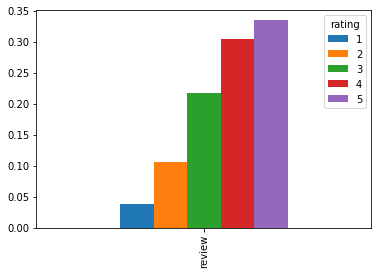

In [72]:
word.plot(kind='bar')

In [46]:
def word_weight(string):
    word = data_new[data_new['review'].str.contains(string)].groupby(['rating']).agg('count')
    word['review'] = word['review'] / word['review'].sum()
    word = word.transpose()
    word['word'] = string
    word = word.set_index('word')
    return word

In [47]:
#apply weight for all words

#1. get all words
#words = set()

#for r in data_new['review'].str.split().map(lambda x: set(x)):
 #   words = words.union(r)
  #  print(words)

In [48]:
#words